# Task 1:

##Research Object
Bullet (Projectile motion)

## Without Air drag force:

## Kinematic analysis:
$$a_x = 0, a_y = -g$$
$$v_{x_0} = v_0 cos(α), v_{y_0} = v_0 sin(α)$$
$$v_x = v_{x_0}, v_y = v_{y_0} - gt$$


$$L = \frac{v^2sin(2α)}{g}$$
I got the formula from this video: https://www.youtube.com/watch?v=8NLzuURxFwY

$$α = \frac{arcsin(Lg/v^2)}{2} = 0.556 °$$

$$H_{max} = \frac{v^2sin^2(α)}{2g} = 10771.82 m$$

## With Air drag force:

$$\begin{bmatrix}
a_x\\
a_y
\end{bmatrix} = \begin{bmatrix}
\frac{-kv_x}{m}\sqrt{v_x^2 + v_y^2}\\
-g - \frac{-kv_y}{m}\sqrt{v_x^2 + v_y^2}
\end{bmatrix}$$

We will solve these differential equations numerically, then we will find the appropriate angle alpha to use using binary search which for each angle will find the value of x of the bullet when it lands. If it lands after the target we reduce alpha, otherwise we increase it. 

Angle alpha is:  1.8318765051662922 degrees


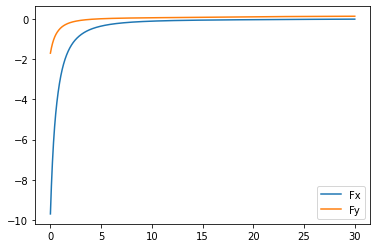

In [12]:
from scipy.integrate import solve_ivp
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import math
h0 = 0
v0 = 870
L = 1500
k = 1.3 * 10 ** (-5)
m = 13.6 / 1000
g = 9.8
eps = 1e-2
def rhs(s, v): 
    return [-k * v[0] / m * (v[0]**2 + v[1]**2)**0.5, -g -k * v[1] / m * (v[0]**2 + v[1]**2)**0.5]

tt = np.linspace(0,30,1000)
alpha = 10

sol = []
def solve(alpha):
  tt = np.linspace(0,30,5000)
  res = solve_ivp(rhs,(0, 30),[v0 * math.cos(math.radians(alpha)), v0 * math.sin(math.radians(alpha))],t_eval = tt)
  vy = res.y[1]
  vx = res.y[0]
  x = 0
  y = 0
  tt = res.t
  for i in range(0,len(tt)-2):
    x += vx[i] * (tt[i+1] - tt[i])
    y += vy[i] * (tt[i+1] - tt[i])
    if y < eps:
      return x
  print(x," ",y)
  resx = scipy.integrate.trapz(res.y[0], x=res.t)
  resy = scipy.integrate.trapz(res.y[1], x=res.t)
  print(resx," ",resy)
  return 0

def bin(l,r):
  if abs(r - l) < 1e-7:
    return l
  mid = (l+r)/2
  b = solve(mid)
  if b > 1500:
    return bin(l,mid)
  else: 
    return bin(mid,r)

sol = bin(0,45)
print("Angle alpha is: ",sol, "degrees")


tt = np.linspace(0,30,5000)
res = solve_ivp(rhs,(0, 30),[v0 * math.cos(math.radians(alpha)), v0 * math.sin(math.radians(alpha))],t_eval = tt)
vy = res.y[1]
vx = res.y[0]
fx =  - vx * k * (vx**2 + vy**2)**0.5
fy = - vy * k * (vx ** 2 + vy ** 2) ** 0.5



plt.plot(tt,fx)

plt.plot(tt,fy)
plt.legend(["Fx","Fy"])


# Task 2:

## Research Objects:
-Particle M — Planar motion

-Object A — rotational motion

## Force Analysis:
$\vec{G}$ (weight of M)

$\vec{N}$ (Reaction force of A on M)

##Solution:

$$R = mw^2Nx$$
$$mx''= G + N = mgsin(wt) + mw^2x$$
$$x'' = gsin(wt) + w^2x$$

Solve the differential equation numerically, plot positions and find the time when the particle leaves A (x > r):

To find the pressure we need to investigate other direction of forces:
and we already get it while solving the equation numerically:

$$N + F_c − mgcos(wt) = 0$$ and $F_C = 2mwv_r$ ; $vr = x'$
then:
$$N = mgcos(wt) − 2mwv_r$$


Ball leaves at time:  0.46046046046046046


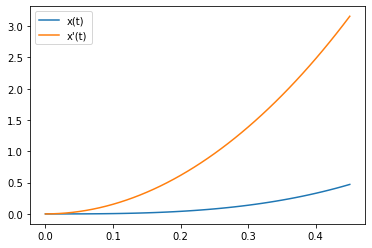

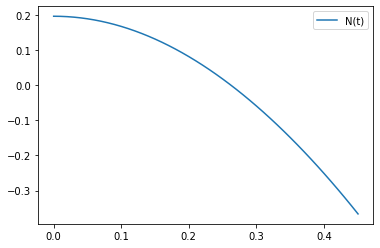

In [11]:
from scipy.integrate import solve_ivp
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan, sqrt, asin, acos,pi
import scipy.integrate as integrate
from scipy.integrate import odeint

m = 0.02
w = np.pi
r = 0.5
g = 9.8

def eq(v,t):
     
  return [v[1], w*w*v[0] + g*sin(w*t)]

v0 = [0,0]
t = np.linspace(0,10,1000)

vx = odeint(eq,v0,t)
stop = 0
for i in vx[:,0]:
  if(i >= r):
     break
  stop += 1

print("Ball leaves at time: ",t[stop])
normal_force = []
for i,tt in enumerate(t[:stop]):
  normal_force.append(m*g*cos(w*tt) - 2*m*w*vx[i,1])

plt.plot(t[:stop],vx[:stop,0], label="x(t)")
plt.plot(t[:stop],vx[:stop,1], label="x'(t)")
plt.legend()
plt.show()

plt.plot(t[:stop],normal_force, label="N(t)")
plt.legend()
plt.show()